In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
dataset_cancer = load_breast_cancer()
print (dataset_cancer.feature_names)
print (dataset_cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [3]:
dataset_diabetes = load_diabetes()
print (dataset_diabetes.feature_names)
print (dataset_diabetes.target)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 26

In [4]:
X_train_can, X_test_can, y_train_can, y_test_can = train_test_split(dataset_cancer.data, dataset_cancer.target, stratify=dataset_cancer.target, random_state=42)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(dataset_cancer.data, dataset_cancer.target, stratify=dataset_cancer.target, random_state=42)

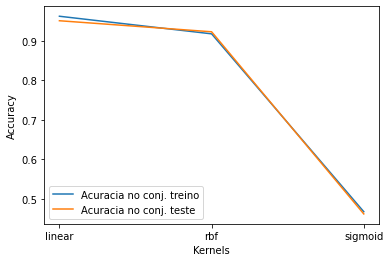

In [5]:
# SVM
training_accuracy = []
test_accuracy = []

kernels = ['linear', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_model = svm.SVC(kernel=kernel)
    
    svm_model.fit(X_train_can, y_train_can)
    training_accuracy.append(svm_model.score(X_train_can, y_train_can))
    test_accuracy.append(svm_model.score(X_test_can, y_test_can))
    
plt.plot(kernels, training_accuracy, label='Acuracia no conj. treino')
plt.plot(kernels, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Accuracy')
plt.xlabel('Kernels')
plt.legend()

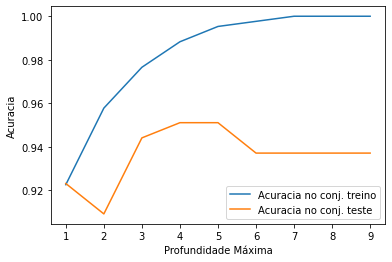

In [6]:
# DECISION TREE
training_accuracy = []
test_accuracy = []

prof_max = range(1, 10)

for md in prof_max:
    tree = DecisionTreeClassifier(max_depth=md, random_state=0)
    tree.fit(X_train_can, y_train_can)
    training_accuracy.append(tree.score(X_train_can, y_train_can))
    test_accuracy.append(tree.score(X_test_can, y_test_can))
    
plt.plot(prof_max, training_accuracy, label='Acuracia no conj. treino')
plt.plot(prof_max, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('Profundidade Máxima')
plt.legend()

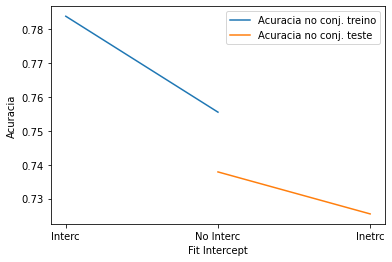

In [7]:
# REGRESSÃO LINEAR
training_accuracy = []
test_accuracy = []

for interception in [True, False]:
    regr = LinearRegression(fit_intercept=interception)
    regr.fit(X_train_dia, y_train_dia)
    training_accuracy.append(regr.score(X_train_dia, y_train_dia))
    test_accuracy.append(regr.score(X_test_dia, y_test_dia))
    
plt.plot(["Interc", "No Interc"], training_accuracy, label='Acuracia no conj. treino')
plt.plot(["Inetrc", "No Interc"], test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.xlabel('Fit Intercept')
plt.legend()